# Screenplay Genre Classifier

## Model Building

In this section, I test out different feature extration techinques as well as different multilabel classification algorithims. They are saved to a dictionary which I then use to observe the average hamming loss of each model. I chose hamming loss as the metric to measure the integrity of my models because it takes the fraction of wrong labels to all labels. This is ideal in my case because there are simialrieites between genres like Action and Adventure where the classifier could confuse one for another. Aditionally, it is a better measurement than accuracy because accuracy would require the whole 18 element array to be predicted correctly which seem infeasible given the scope of the project. For example, if the machine predicted 16/18 labels correctly, then the accuracy would be 0, while hamming loss would equal 0.11.

In [ ]:
#importing necessary packages
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from topicmodels import Modeling
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import hamming_loss

In [2]:
#loading in training and testing data
X_train = pd.read_csv('data/X_train.csv', index_col=[0])
X_test = pd.read_csv('data/X_test.csv', index_col=[0])
y_train = pd.read_csv('data/y_train.csv', index_col=[0])
y_test = pd.read_csv('data/y_test.csv', index_col=[0])

In [3]:
models_dct = {'model': [], 'hamming_loss': [], 'model_type': []} #initalizing dictonary to store results

def model_update(model, dct, model_type):

    """
    This function takes in a fitted model, dictionary, and descirpition of the model.
    It returns an updated dictonary that will later be used to evaluate model results.

    """

    y_pred = model.predict(X_test.text)

    ham_loss = hamming_loss(y_test, y_pred)

    models_dct['model'].append(model)
    models_dct['hamming_loss'].append(ham_loss)
    models_dct['model_type'].append(model_type)

    print(ham_loss)

In [4]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.dropna(inplace=True) #delete this

In [5]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test.dropna(inplace=True) #delete this

In [6]:
X_train = df_train.loc[:, ['text', 'title']]
y_train = df_train.drop(columns=['text', 'title'], axis=1)

X_test = df_test.loc[:, ['text', 'title']]
y_test = df_test.drop(columns=['text', 'title'], axis=1)



## First Section: Model Building

I trade off between CountVecotrizer and TfidfVectorizer with various multilclassifier  combinations to optimize hamming_loss score.

In [7]:
#countvecotrizer, classifier chain, logistic regression

pipe = Pipeline([('cv', CountVectorizer()), ('model', ClassifierChain(LogisticRegression()))])
pipe.fit(X_train.text, y_train)

model_update(pipe, models_dct, 'CC with CV and LG')

C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.12007168458781362


In [8]:
#tfidvecotrizer, classifier chain, logistic regression

pipe_tf_cc = Pipeline([('tf', TfidfVectorizer()), ('model', ClassifierChain(LogisticRegression()))])
pipe_tf_cc.fit(X_train.text, y_train)

model_update(pipe_tf_cc, models_dct, 'CC with TF and LG')

0.1370496132805131


In [9]:

pipe_cv_cc_rf = Pipeline([('cv', CountVectorizer()), ('model', ClassifierChain(RandomForestClassifier()))])
pipe_cv_cc_rf.fit(X_train.text, y_train)

model_update(pipe_cv_cc_rf, models_dct, 'CC with CV and RF')

0.12299566119600075


In [10]:
pipe_three = Pipeline([('cv', TfidfVectorizer()), ('model', ClassifierChain(RandomForestClassifier()))])
pipe_three.fit(X_train.text, y_train)

model_update(pipe_three, models_dct, 'CC with Tf and RF')

0.12242973023957744


In [11]:
pipe_four = Pipeline([('cv', CountVectorizer()), ('model', ClassifierChain(GradientBoostingClassifier()))])
pipe_four.fit(X_train.text, y_train)

model_update(pipe_four, models_dct, 'CC with CV and GBC')

0.11450669684965101


In [12]:
pipe_five = Pipeline([('cv', TfidfVectorizer()), ('model', ClassifierChain(GradientBoostingClassifier()))])
pipe_five.fit(X_train.text, y_train)

model_update(pipe_cv_cc_rf, models_dct, 'CC with CV and RF')

0.12299566119600075


In [13]:
pipe_six = Pipeline([('cv', CountVectorizer()), ('model', OneVsRestClassifier(LogisticRegression()))])
pipe_six.fit(X_train.text, y_train)

model_update(pipe_six, models_dct, 'OVR with CV and LG')

C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.12073193737030749


In [14]:
pipe_seven = Pipeline([('cv', TfidfVectorizer()), ('model', OneVsRestClassifier(LogisticRegression()))])
pipe_seven.fit(X_train.text, y_train)

model_update(pipe_six, models_dct, 'OVR with TF and LG')

0.12073193737030749


In [15]:
pipe_eight = Pipeline([('cv', CountVectorizer()), ('model', OneVsRestClassifier(RandomForestClassifier()))])
pipe_eight.fit(X_train.text, y_train)

model_update(pipe_eight, models_dct, 'OVR with CV and Rf')

0.12280701754385964


In [16]:
pipe_nine = Pipeline([('cv', TfidfVectorizer()), ('model', OneVsRestClassifier(RandomForestClassifier()))])
pipe_nine.fit(X_train.text, y_train)

model_update(pipe_eight, models_dct, 'OVR with TV and Rf')

0.12280701754385964


### Second Section: Evaluating Results between Models

In [20]:
#saving dct as a dataframe
model_data = pd.DataFrame(models_dct)

In [26]:
#importing necessary packages for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
ham = model_data.sort_values(by='hamming_loss').hamming_loss
mt = model_data.sort_values(by='hamming_loss').model_type

C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


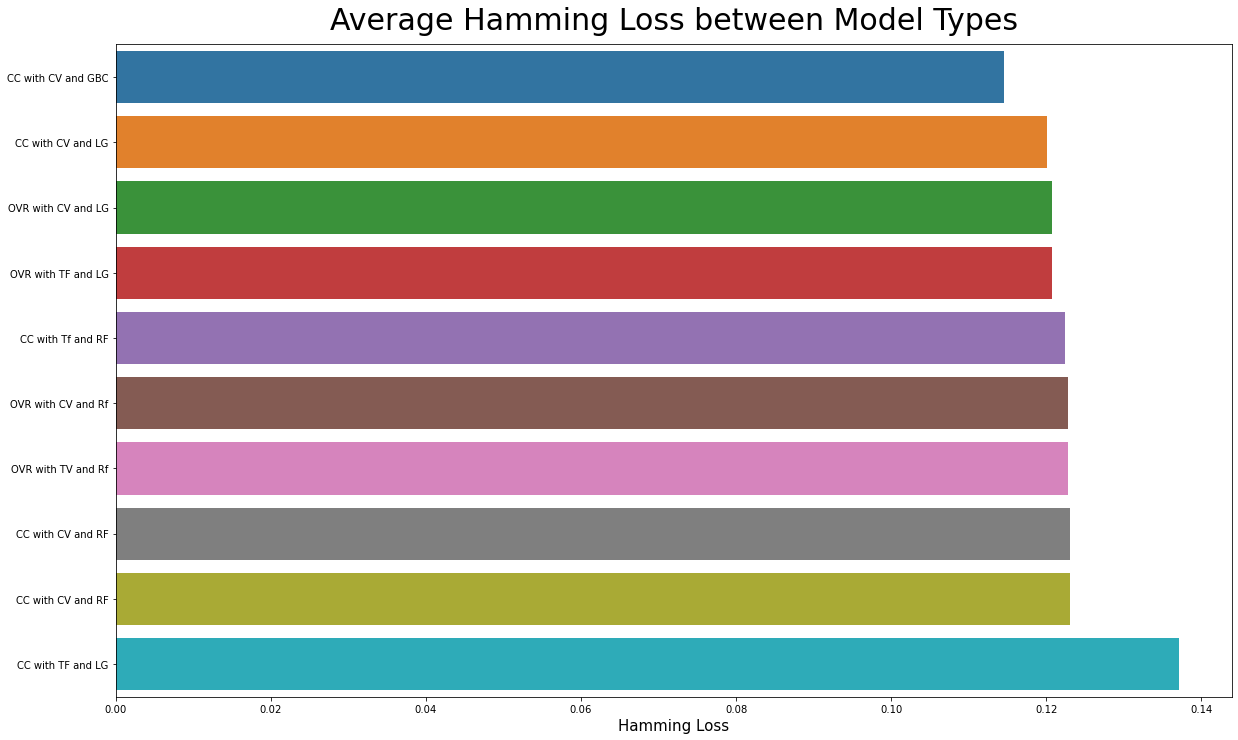

In [38]:
#plotting avg ham loss of models
fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(ham, list(range(len(ham))), orient='h', ax=ax)

ax.set_yticks(list(range(len(ham))))
ax.set_yticklabels(mt)

ax.set_title('Average Hamming Loss between Model Types', fontsize=30, pad=15)
ax.set_xlabel('Hamming Loss', fontsize=15)

plt.show()

### Third Section: Evaluating Best Model's predictions

In this section, I evaluate the ClassifierChain with base estimator as GradientBoostingClassifier and CountVectorizer as the feature. I look at average ham loss by genre.

In [53]:
import numpy as np

y_pred = pipe_four.predict(X_test.text) #predictions on best model

dct = {'title': [], 'real': [], 'pred': []}

for i in range(len(y_test)):

    dct['real'].append(np.array(y_test.iloc[i]))
    dct['pred'].append(y_pred[i])
    dct['title'].append(X_test.title.iloc[i])

In [57]:
predictions = pd.DataFrame(dct, index=X_test.index) #converting dct to dataframe

In [58]:
def labeller(arry):
    
    """
    This function converts predicted array to list of genres
    
    """
    
    lst = []

    for i, x in enumerate(arry):
        if x ==1:
            lst.append(genre_list[i])

    return lst

In [63]:
predictions['actual'] = predictions.real.apply(lambda x: labeller(x)) #actual genres
predictions['predicted'] = predictions.pred.apply(lambda x: labeller(x)) #predicted genres

In [68]:
ham_loss = [] #appending ham_loss by single row

for i in predictions.index:
    ham_loss.append(hamming_loss(predictions.real[i], predictions.pred[i]))

predictions['ham_loss'] = ham_loss

In [71]:
def genre_enocoding(row, genre):

    """
    One hot encodes prediction dataframe
    
    """
    
    if genre in row:
        return 1
    else:
        return 0

In [73]:
for i in genre_list:
    predictions[i] = predictions.actual.apply(lambda x: genre_enocoding(x, i))

In [75]:
ham_loss_by_genre = [] #appending avg_ham_loss by genre
for i in genre_list:
    ham_loss_by_genre.append(predictions[predictions[i] == 1].ham_loss.mean())

C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


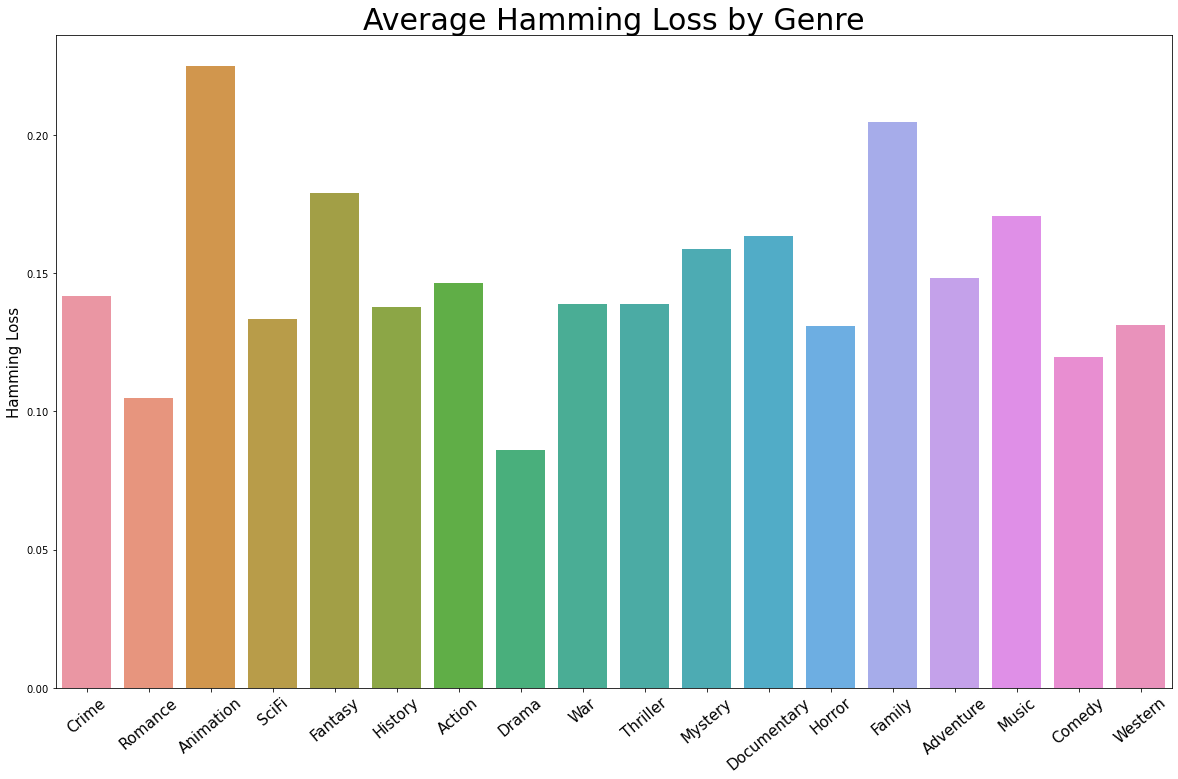

In [82]:
#plotting average ham loss by genre
fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(list(range(0,18)), ham_loss_by_genre)
ax.set_title("Average Hamming Loss by Genre", fontsize=30)
ax.set_xticks(list(range(0,18)))
ax.set_xticklabels(genre_list, fontsize=15, rotation=40)
ax.set_ylabel('Hamming Loss', fontsize=15)


plt.show()

In [94]:
predictions['genre_length'] = predictions.actual.apply(lambda x: len(x))

<AxesSubplot:title={'center':'Avgerage Hamming Loss by Genre Combination'}, ylabel='genre_length'>

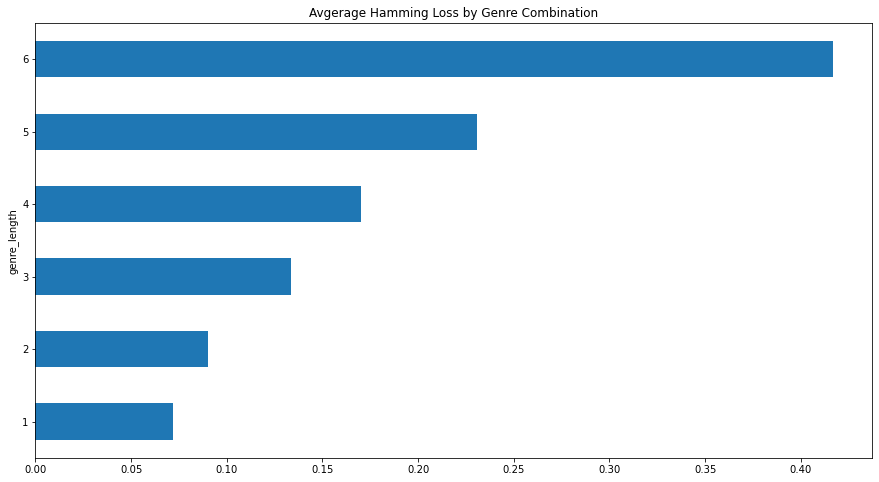

In [99]:
predictions.groupby(['genre_length'])['ham_loss'].mean().plot(kind='barh', figsize=(15,8), title='Avgerage Hamming Loss by Genre Combination')